In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plot
from scipy.optimize import curve_fit
from scipy.special import wofz
from scipy.integrate import simps

In [2]:
muons=open("Data2/mini_muons.txt")
data=muons.readlines()

In [3]:
def V(x,alpha,gamma): 
    sigma=alpha/np.sqrt(2*np.log(2))
    return np.real(wofz((x+1j*gamma)/sigma/np.sqrt(2)))/sigma/np.sqrt(2*np.pi)

def E(x,tau):
    return np.exp(-x/tau)

def normfunc(x,s,tau,alpha,gamma):
    Vlist=V(x,alpha,gamma)
    Elist=E(x,tau)
    normalV=Vlist/simps(Vlist,x)
    normalE=Elist/simps(Elist,x)
    return (((1-s)*normalE)+(s*normalV))

def muonsort(isomax,s,tau,alpha,gamma):

    scmass=[]
    ocmass=[]

    #Seperating Lines (Three Layers) (Pt, Eta, Phi, Charge, Iso)
    #First Layer (Number of Muons)
    for i in range(len(data)):
        if "NumMuons: 2" in data[i]:
            muon1=data[i+1]
            muon2=data[i+2]
            list1=muon1.split()
            list2=muon2.split()
            muon1=[list1[3],list1[5],list1[7],list1[9],list1[11]]
            muon2=[list2[3],list2[5],list2[7],list2[9],list2[11]]
        
            #Second Layer (Iso Value)
            if float(muon1[4])<=isomax and float(muon2[4])<=isomax:
            
                #Calculating Momentum
                px1=float(muon1[0])*np.cos(float(muon1[2]))
                py1=float(muon1[0])*np.sin(float(muon1[2]))
                pz1=float(muon1[0])*np.sinh(float(muon1[1]))
                px2=float(muon2[0])*np.cos(float(muon2[2]))
                py2=float(muon2[0])*np.sin(float(muon2[2]))
                pz2=float(muon2[0])*np.sinh(float(muon2[1]))
        
                #Calculating Energy
                p_1=np.sqrt((px1**2+py1**2+pz1**2))
                p_2=np.sqrt((px2**2+py2**2+pz2**2))
                mm=0.1056583755
                en1=np.sqrt((mm**2+p_1**2))
                en2=np.sqrt((mm**2+p_2**2))
            
                #Calculating Invariant Mass
                m=np.sqrt(2*mm**2+2*(en1*en2-(px1*px2+py1*py2+pz1*pz2)))
            
                #Third Layer (Splitting Same and Oppositely Charged Muons)
                if muon1[3]==muon2[3] and 70.0<=m<=110.0:
                    scmass.append(m)
                if muon1[3]!=muon2[3] and 70.0<=m<=110.0:
                    ocmass.append(m)
        
            else:
                continue
                
    print('Amount of Opposite Charge Collisions:',len(ocmass))
    binsize=np.histogram_bin_edges(ocmass,bins='auto',range=(70,110))
    (n,bins,patches)=plot.hist(ocmass,bins=binsize,range=(70,110),density=True,color="darkorange",label="OS Muons")
    center=(bins[:-1]+bins[1:])/2
    xshift=center-91
    stag=curve_fit(normfunc,xshift,n,p0=(s,tau,alpha,gamma),bounds=(0,[1.,np.inf,np.inf,np.inf]))
    print("Signal Fraction =",stag[0][0]*100,'%')
    STD=np.sqrt(np.diag(stag[1]))
    print('Uncertainty of Signal Fraction = \u00B1',STD[0]*100,'%')
    Elist=E(xshift,tau)
    normalE=Elist/simps(Elist,xshift)
    plot.plot(center,(1-stag[0][0])*normalE,color="black",linestyle="--",label="Background")
    plot.plot(center,normfunc(xshift,stag[0][0],stag[0][1],stag[0][2],stag[0][3]),color="black",linestyle="-.",label="Signal+Background")
    plot.xlabel("Mass (GeV)")
    plot.ylabel("% of Counts")
    plot.legend()
    plot.title(label=('Opposite Charge Muons with Maximum Boundary '+str(isomax)))
    plot.show()
    binsize=np.histogram_bin_edges(scmass,bins='auto',range=(70,110))
    (n,bins,patches)=plot.hist(scmass,bins=binsize,range=(70,110),density=True,color="darkorange",label="SS Muons")
    center=(bins[:-1]+bins[1:])/2
    xshift=center-91
    t=curve_fit(E,xshift,n,p0=(tau))
    Elist=E(xshift,tau)
    normalE=Elist/simps(Elist,xshift)
    plot.plot(center,normalE,color="black",linestyle="--",label="Background")
    plot.yscale("log")
    plot.xlabel("Mass (GeV)")
    plot.ylabel("% of Counts")
    plot.legend()
    plot.title(label=('Same Charge Muons with Maximum Boundary '+str(isomax)))
    plot.show()
    print(' ')

Amount of Opposite Charge Collisions: 64687
Signal Fraction = 94.87814592924279 %
Uncertainty of Signal Fraction = ± 2.0082445556084196 %


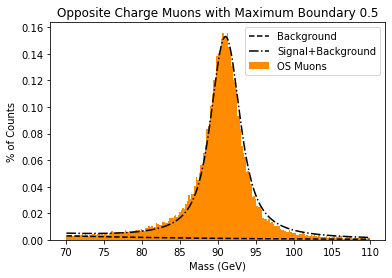

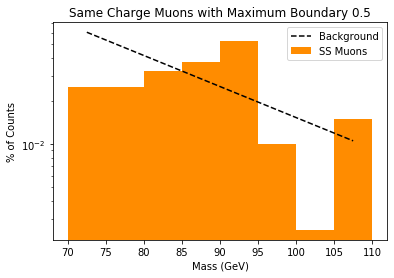

 
Amount of Opposite Charge Collisions: 67429
Signal Fraction = 93.5037530972249 %
Uncertainty of Signal Fraction = ± 2.016241571736784 %


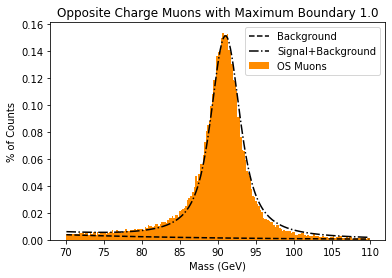

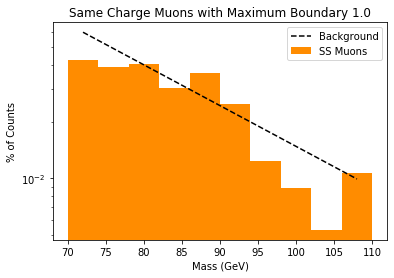

 
Amount of Opposite Charge Collisions: 68108
Signal Fraction = 92.87797489381857 %
Uncertainty of Signal Fraction = ± 2.002051638411824 %


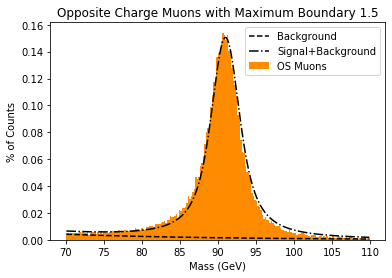

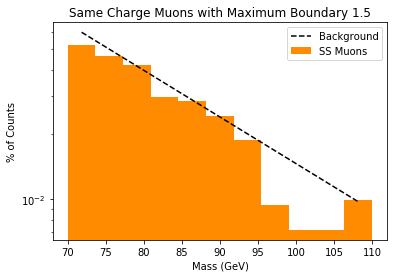

 
Amount of Opposite Charge Collisions: 68421
Signal Fraction = 92.39525513900911 %
Uncertainty of Signal Fraction = ± 2.006867237019739 %


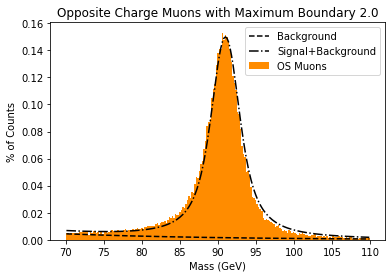

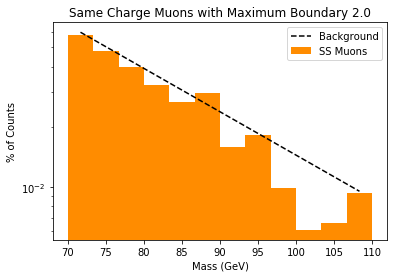

 
Amount of Opposite Charge Collisions: 68611
Signal Fraction = 92.16684792553458 %
Uncertainty of Signal Fraction = ± 1.9968244989910522 %


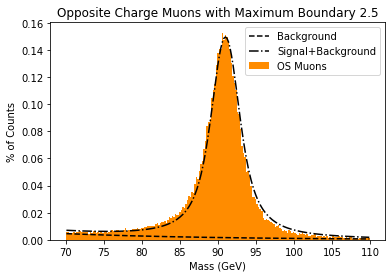

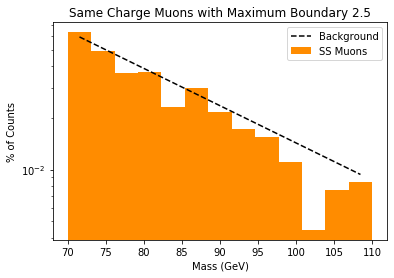

 
Amount of Opposite Charge Collisions: 68731
Signal Fraction = 92.11953234998941 %
Uncertainty of Signal Fraction = ± 1.9781314217343586 %


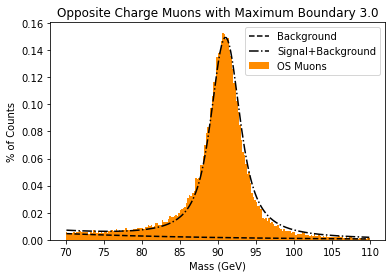

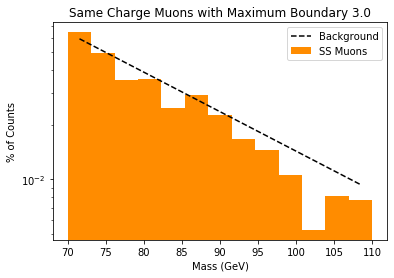

 
Amount of Opposite Charge Collisions: 68819
Signal Fraction = 92.00397652849323 %
Uncertainty of Signal Fraction = ± 1.9757731510986896 %


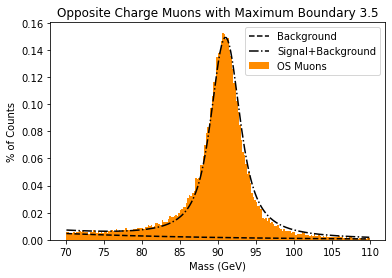

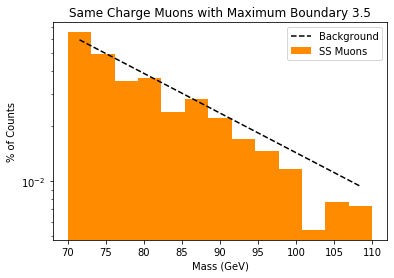

 
Amount of Opposite Charge Collisions: 68869
Signal Fraction = 91.93666465487557 %
Uncertainty of Signal Fraction = ± 1.9739681093469124 %


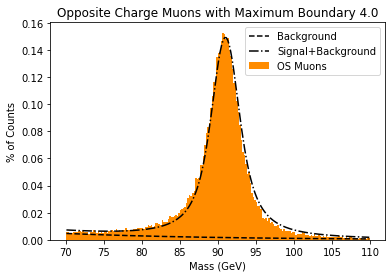

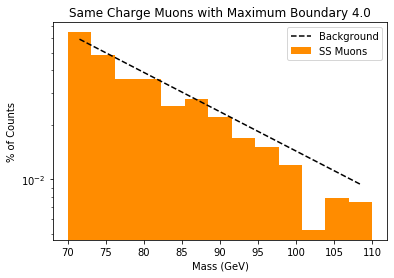

 
Amount of Opposite Charge Collisions: 68888
Signal Fraction = 91.91288247867526 %
Uncertainty of Signal Fraction = ± 1.974612669092463 %


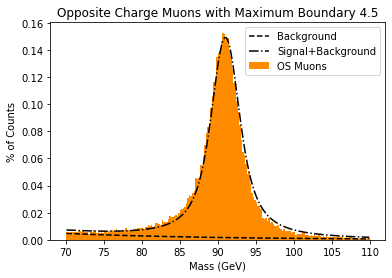

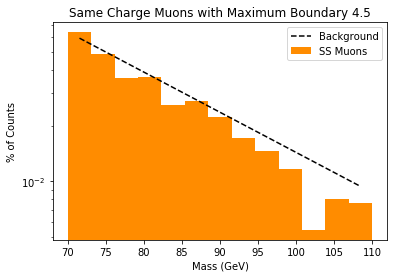

 
Amount of Opposite Charge Collisions: 68905
Signal Fraction = 91.89572352228545 %
Uncertainty of Signal Fraction = ± 1.9743368440196838 %


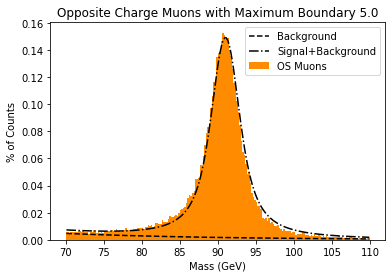

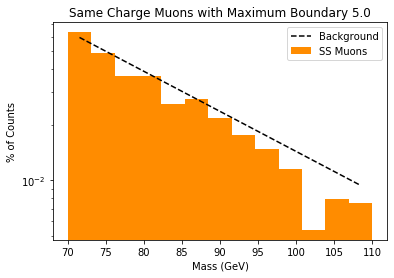

In [4]:
#muonsort(isomax,s,tau,alpha,gamma)
muonsort(0.5,0.8,20,0.2,2)
muonsort(1.0,0.8,20,0.2,2)
muonsort(1.5,0.8,20,0.2,2)
muonsort(2.0,0.8,20,0.2,2)
muonsort(2.5,0.8,20,0.2,2)
muonsort(3.0,0.8,20,0.2,2)
muonsort(3.5,0.8,20,0.2,2)
muonsort(4.0,0.8,20,0.2,2)
muonsort(4.5,0.8,20,0.2,2)
muonsort(05.0,0.8,20,0.2,2)